In [193]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats
# 일단 여기서 에러 나서 주석 처리 해 놓음
# matplotlib_inline.backend_inline.set_matplotlib_formats()

#파일 읽어오기
df = pd.read_csv('week_02_data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)

NameError: name 'matplotlib_inline' is not defined

In [ ]:
# 출력해보기

# 앞부터
df.head()

#뒤부터
df.tail()

#샘플출력
df.sample()

# 정보
df.info()

#컬럼명
df.columns

# 데이터 타입
df.dtypes

In [ ]:
# 결측치
# True == 1과 같아서 .sum()을 하면 몇 개인지 정확하게 확인 가능
null_count  = df.isnull().sum()

In [ ]:
# 이거 안 됨... WHY...
# null_count.plot().barh()

In [81]:
# .reset_indes() : 데이터프레임 형태로 전환
df_null_count = null_count.reset_index()

# 컬럼명 변경
df_null_count.columns = ['컬럼명', '결측치수']

# .sort_values : 값으로 정렬
# .sort_index : 인덱스로 정렬
df_null_count_top = df_null_count.sort_values(by='결측치수', ascending=False).head(10)
df_null_count_top

# 데이터가 너무 많을 때 결측치가 너무 많은 데이터들을 제외시키면 데이터 수가 줄어드니까 분석시간을 줄이는 데에 도움이 된다.

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [89]:
# 특정 컬럼만 불러오기
df_null_count_top['컬럼명']

# .tolist() : 리스트 형태로 변환시켜 줌
drop_columns = df_null_count_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [241]:
# axis = 0이면 row 기준으로 drop
# axis = 1이면 column 기준으로 drop

# drop을 시킨다음에 데이터를 아예 바꿔버리려면 다시 df에 재할당을 해주어야 함.
df = df.drop(drop_columns, axis=1)

# inplace=True 라는 옵션을 주면 알아서 재할당을 하는데 쓰는 사람들끼리 얘기가 많으니까 이렇게 쓰는 것보다는 위처럼 쓰는 게 좋다고 함.
# df.drop(drop_columns, axis=1, inplace=True)

In [129]:
# dtypes int64 나 float64 같이 수치형 데이터면 통계를 구할 수 있음

# 평균값
df['위도'].mean()

# 중앙값
df['위도'].median()

#최댓값
df['위도'].max()

#최솟값
df['위도'].min()

#갯수
df['위도'].count()

91335

In [131]:
# describe 기초통계값 요약
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [135]:
df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [137]:
# 문자열 describe, 결측치는 빼고 보여준다.
# top은 가장 많이 등장하는 키워드
# freq는 top의 등장 횟수
df.describe(include='object') 

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [141]:
# 중복제거
df['상권업종대분류명'].unique()
# 중복제거 후 갯수
df['상권업종대분류명'].nunique()

1

In [143]:
df['상권업종중분류명'].unique()
# df['상권업종중분류명'].nunique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [145]:
df['상권업종소분류명'].unique()
# df['상권업종대분류명'].nunique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [165]:
# 각 시도에 몇 개 있는지 세는 방법
city = df['시도명'].value_counts()

# normalize=True 해서 정규화하면 전체에서 어느 정도의 비율을 차지하고 있는지 알 수 있음
city_normalize = df['시도명'].value_counts(normalize=True)

<Axes: ylabel='시도명'>

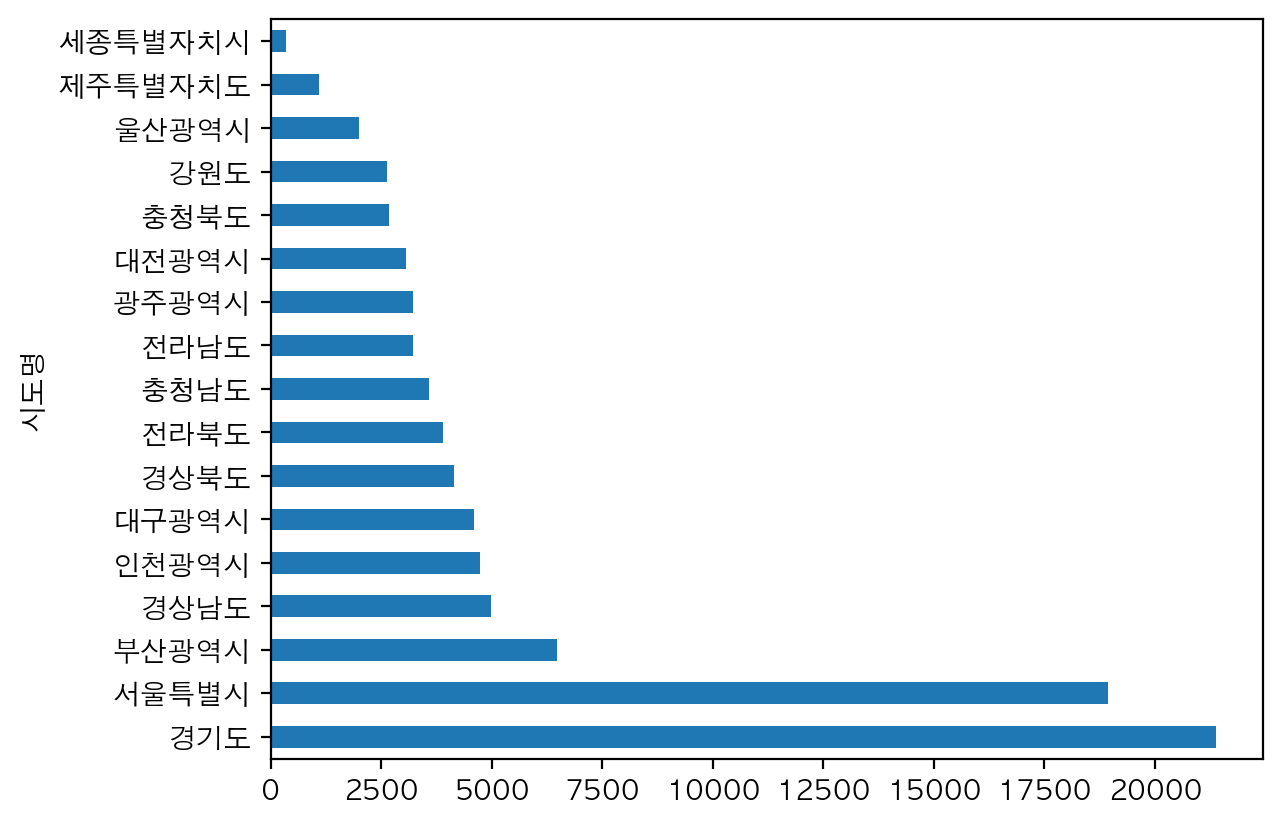

In [179]:
city.plot.barh()

<Axes: ylabel='proportion'>

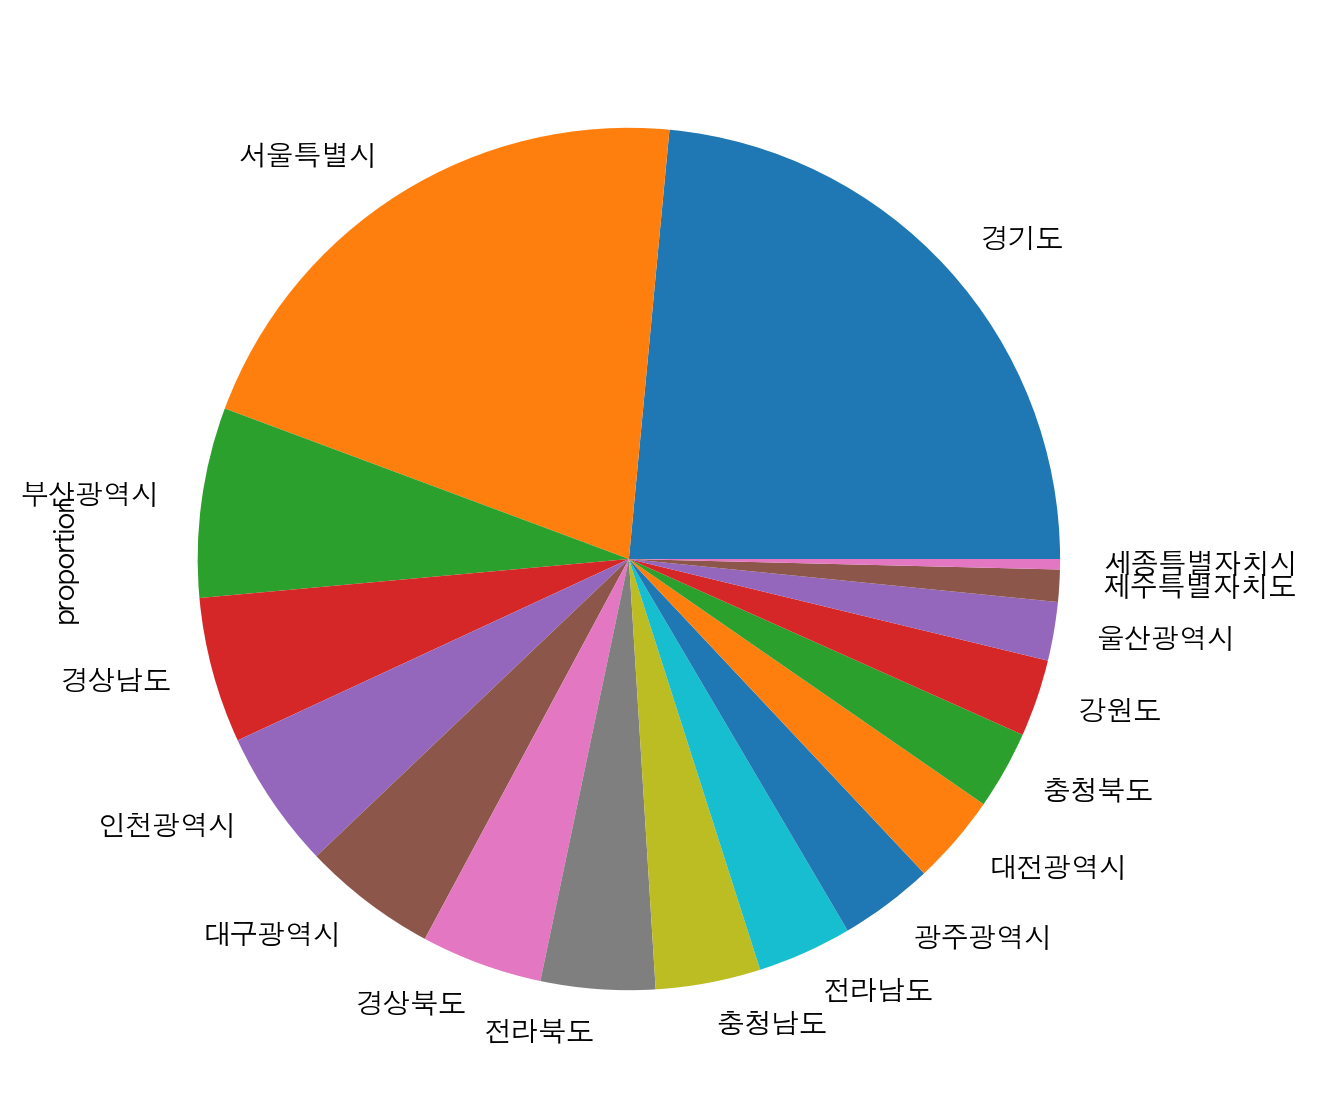

In [185]:
city_normalize.plot.pie(figsize=(7, 7))

<Axes: xlabel='count', ylabel='시도명'>

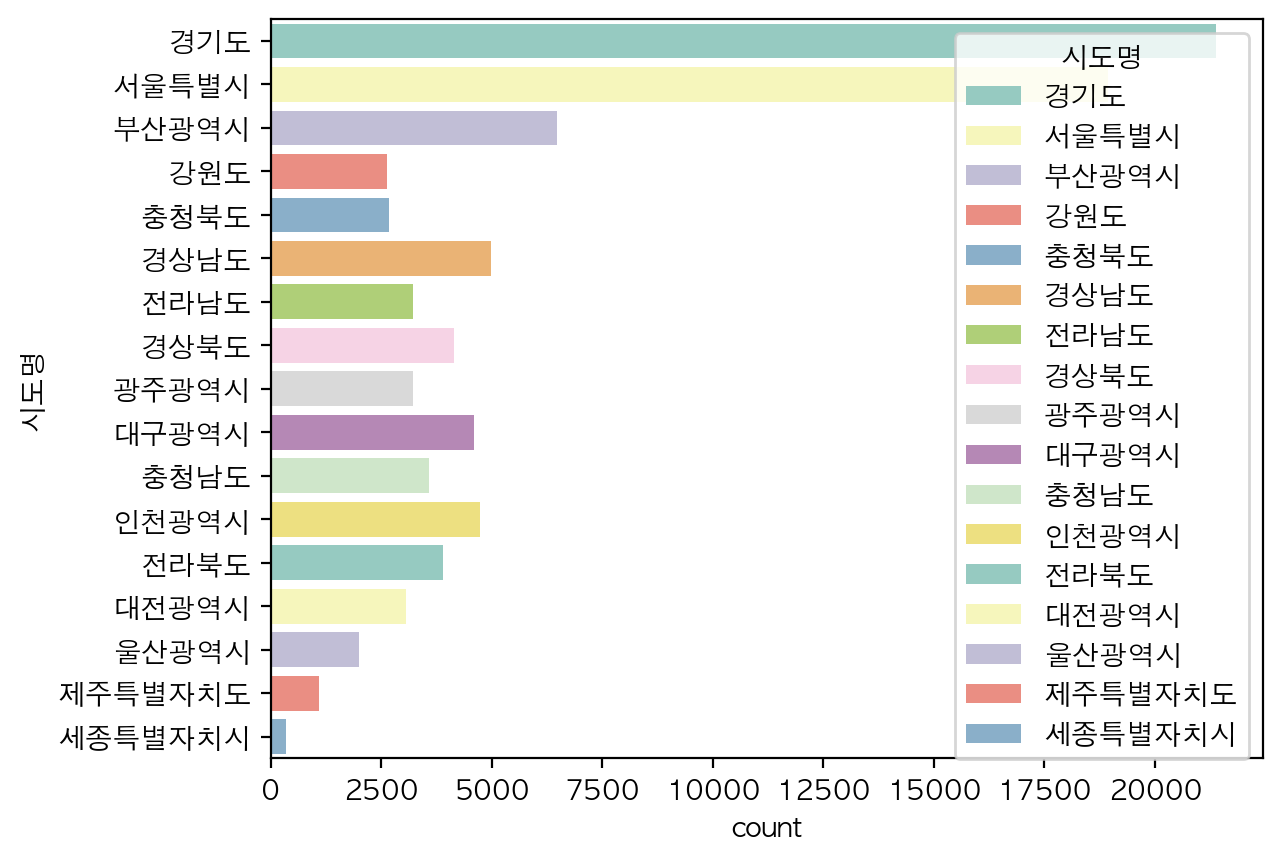

In [219]:
# seaborn 의 countplot
sns.countplot(data=df, y='시도명', hue='시도명', palette='Set3')

In [199]:
storeArea_grande = df['상권업종대분류명'].value_counts()
storeArea_medium = df['상권업종중분류명'].value_counts()
storeArea_vajo = df['상권업종소분류명'].value_counts()

<Axes: xlabel='상권업종중분류명'>

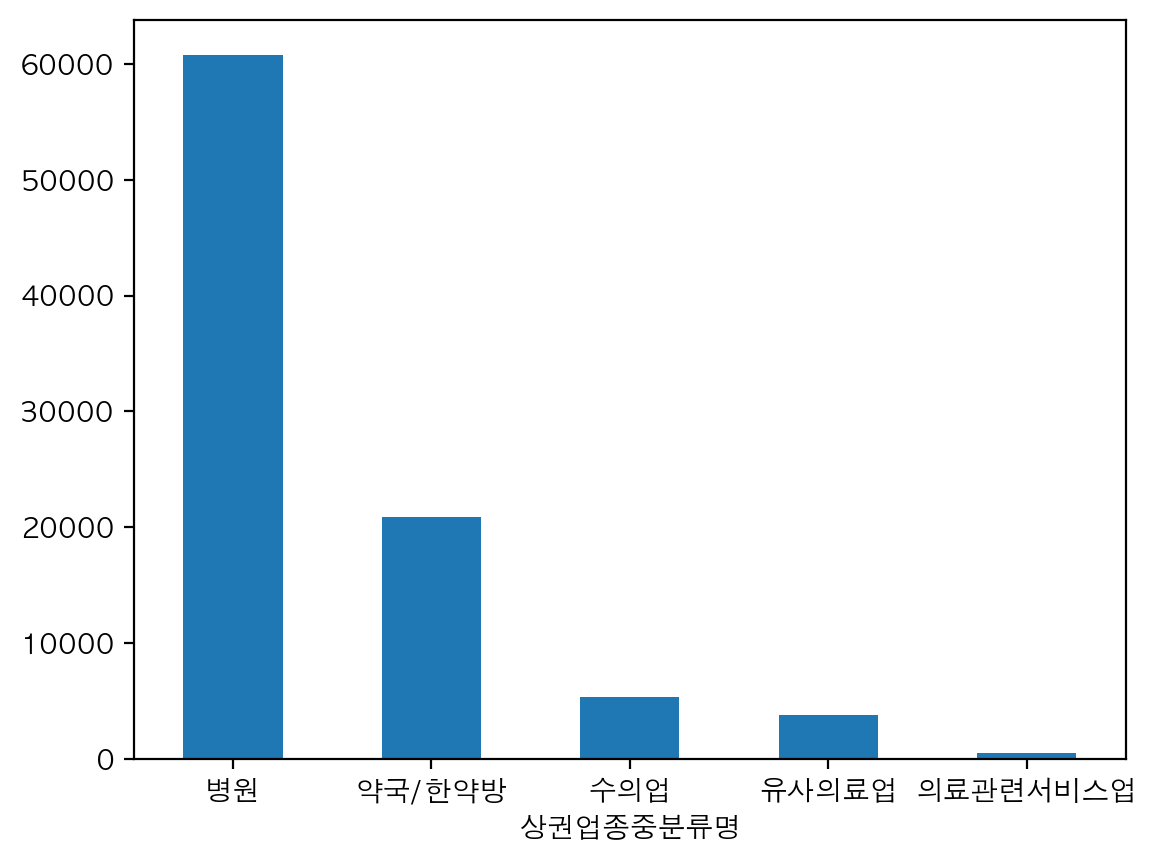

In [203]:
# rot는 rotation
# label 값을 얼만큼 회전시킬 것인가를 결정해주는 것
storeArea_medium.plot.bar(rot=0)

<Axes: ylabel='count'>

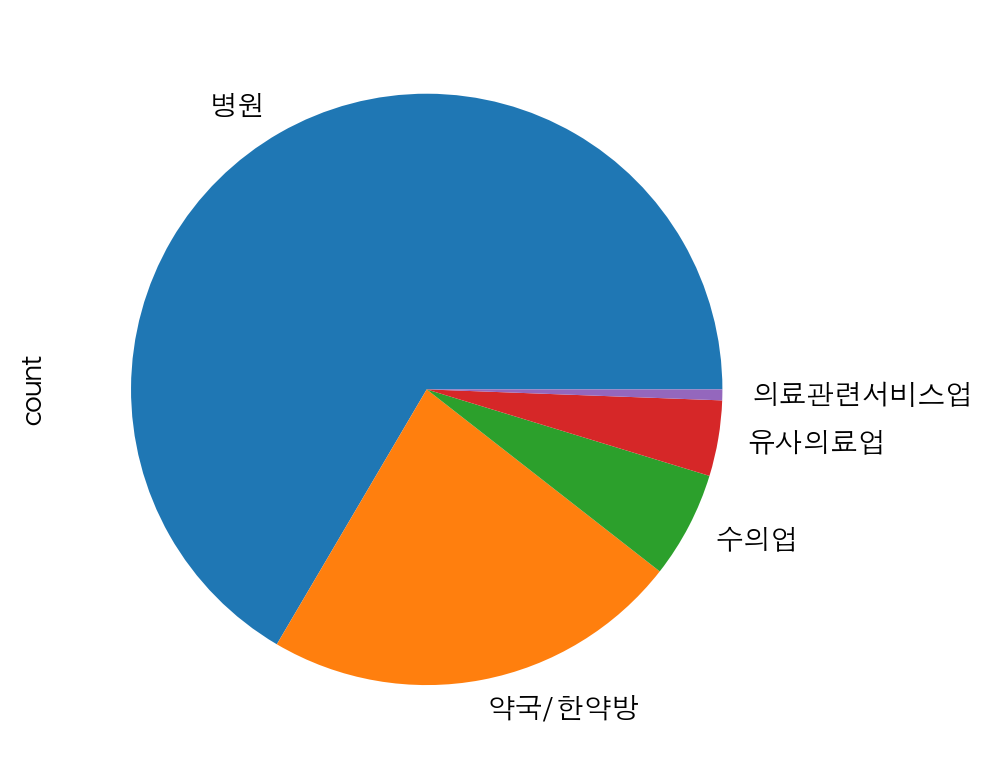

In [205]:
storeArea_medium.plot.pie()

<Axes: ylabel='상권업종소분류명'>

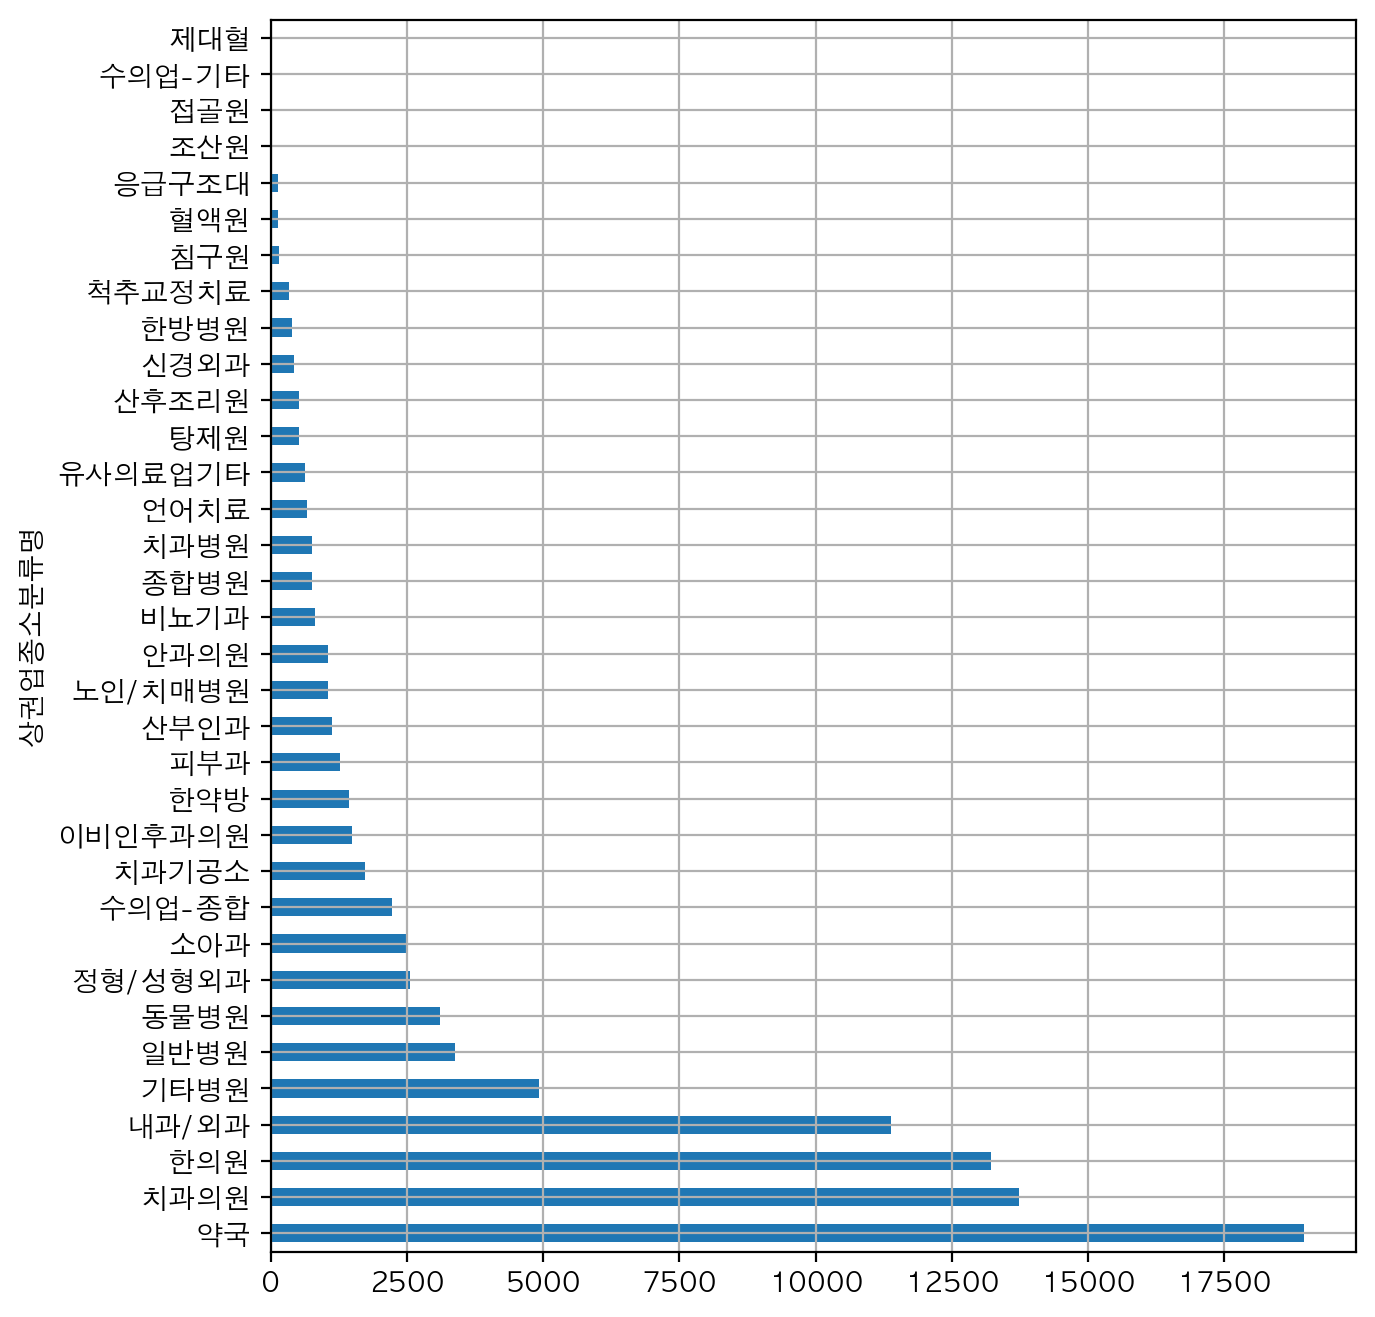

In [213]:
storeArea_vajo.plot.barh(figsize=(7, 8), grid=True)

In [227]:

df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy()
df_medical.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,41.0,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,2.0,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,NaN,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,의약품 및 의료용품 소매업,42.0,강원도,42110.0,춘천시,4211054500,약사명동,4.211010e+09,중앙로2가,4211010500200990000,1,대지,99,NaN,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,NaN,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,그외 기타 분류안된 상품 전문 소매업,43.0,충청북도,43111.0,청주시 상당구,4311168000,금천동,4.311112e+09,금천동,4311112000201870017,1,대지,187,17.0,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,NaN,4311112000101870017042942,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1,NaN,127.499206,36.625355
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,48.0,경상남도,48890.0,합천군,4889046000,용주면,4.889046e+09,용주면,4889046030200780002,2,산,78,2.0,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,35.0,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
13,21217689,제중당한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,의약품 및 의료용품 소매업,46.0,전라남도,46830.0,영암군,4683035000,도포면,4.683035e+09,도포면,4683035023202960000,1,대지,296,NaN,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,10.0,4683035023102960000000001,NaN,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,NaN,NaN,NaN,126.630348,34.834080


In [231]:

df.loc[df['상권업종대분류명'] == '의료', '상권업종중분류명'].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [249]:

df_medi = df[df['상권업종중분류명'] == '유사의료업']

In [251]:

df_medi['상호명'].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

In [263]:

df_seoul_pharmacy = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]
df_seoul_pharmacy.shape

(3579, 29)

In [271]:
p = df_seoul_pharmacy['시군구명'].value_counts()

<Axes: xlabel='시군구명'>

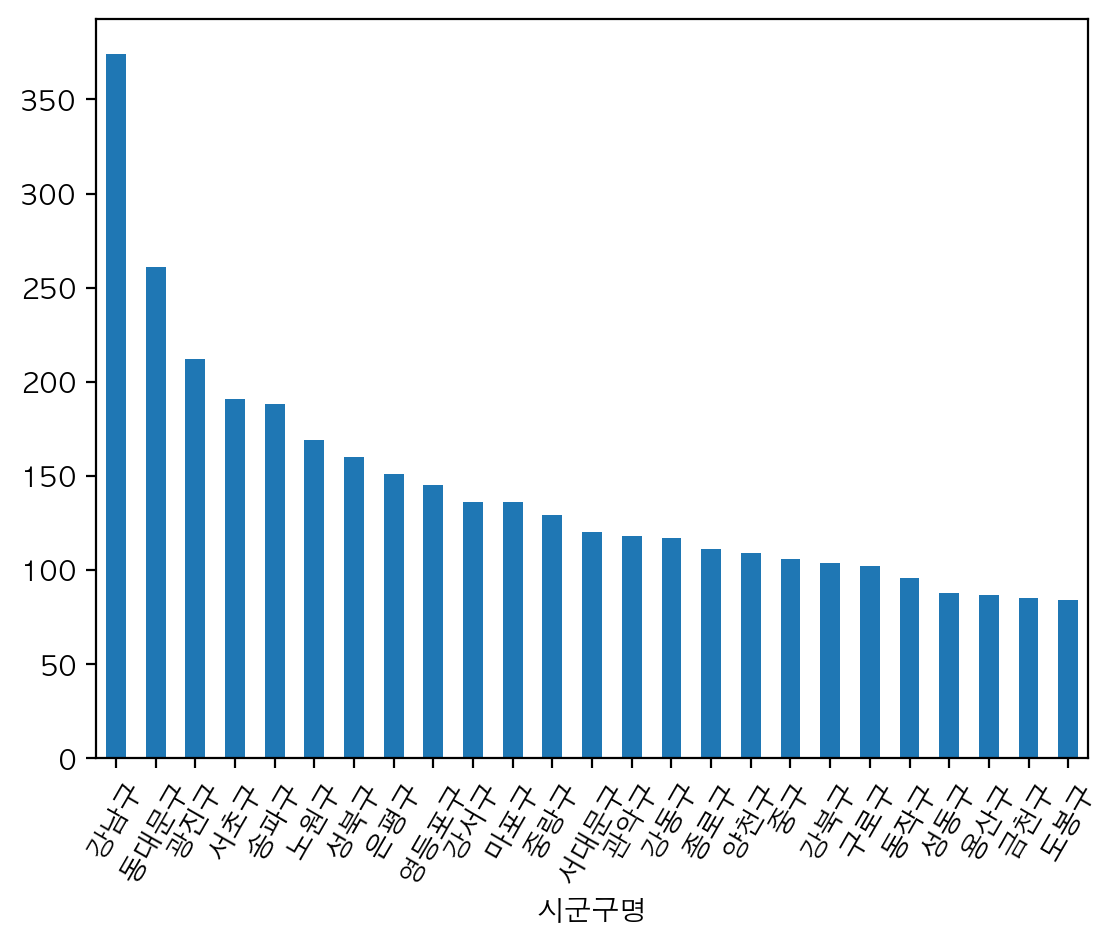

In [273]:
p.plot.bar(rot=60)

In [281]:
df_seoul_hospital = df[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '서울특별시')].copy()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,광진구,1121577000,중곡4동,1.121510e+09,중곡동,1121510100200580025,1,대지,58,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,양천구,1147065000,신정4동,1.147010e+09,신정동,1147010100208970013,1,대지,897,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100207360055,1,대지,736,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156054000,여의동,1.156011e+09,여의도동,1156011000200620000,1,대지,62,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,성동구,1120055000,사근동,1.120011e+09,행당동,1120010700200150001,1,대지,15,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205050000,1,대지,505,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,강동구,1174062000,천호3동,1.174011e+09,천호동,1174010900204530008,1,대지,453,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,중구,1114055000,명동,1.114013e+09,명동2가,1114012700200010001,1,대지,1,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156053500,영등포동,1.156010e+09,영등포동4가,1156010500200900000,1,대지,90,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [287]:
df_seoul_hospital['시군구명'].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

In [301]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [319]:
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [321]:
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [341]:
drop_row = drop_row + drop_row2

AttributeError: 'list' object has no attribute 'unique'

In [343]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<Axes: xlabel='시군구명'>

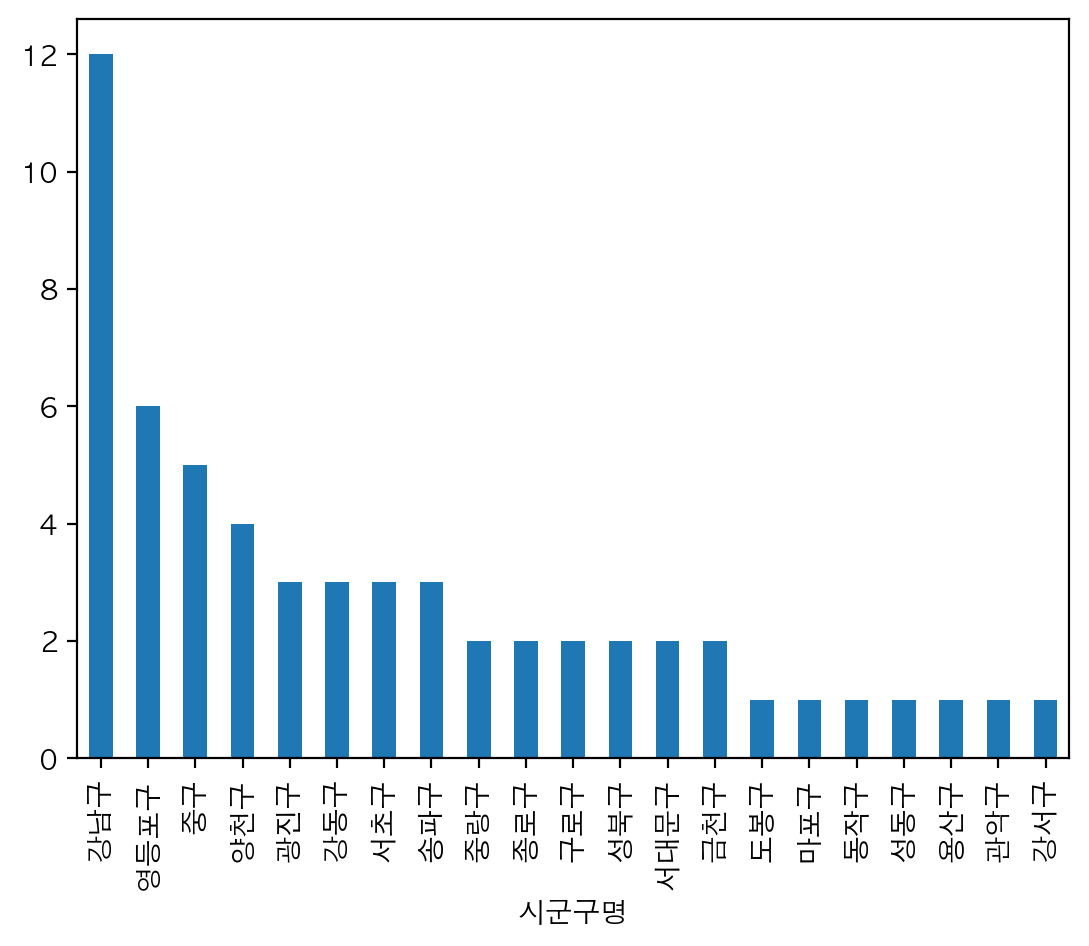

In [347]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

<Axes: xlabel='시군구명', ylabel='count'>

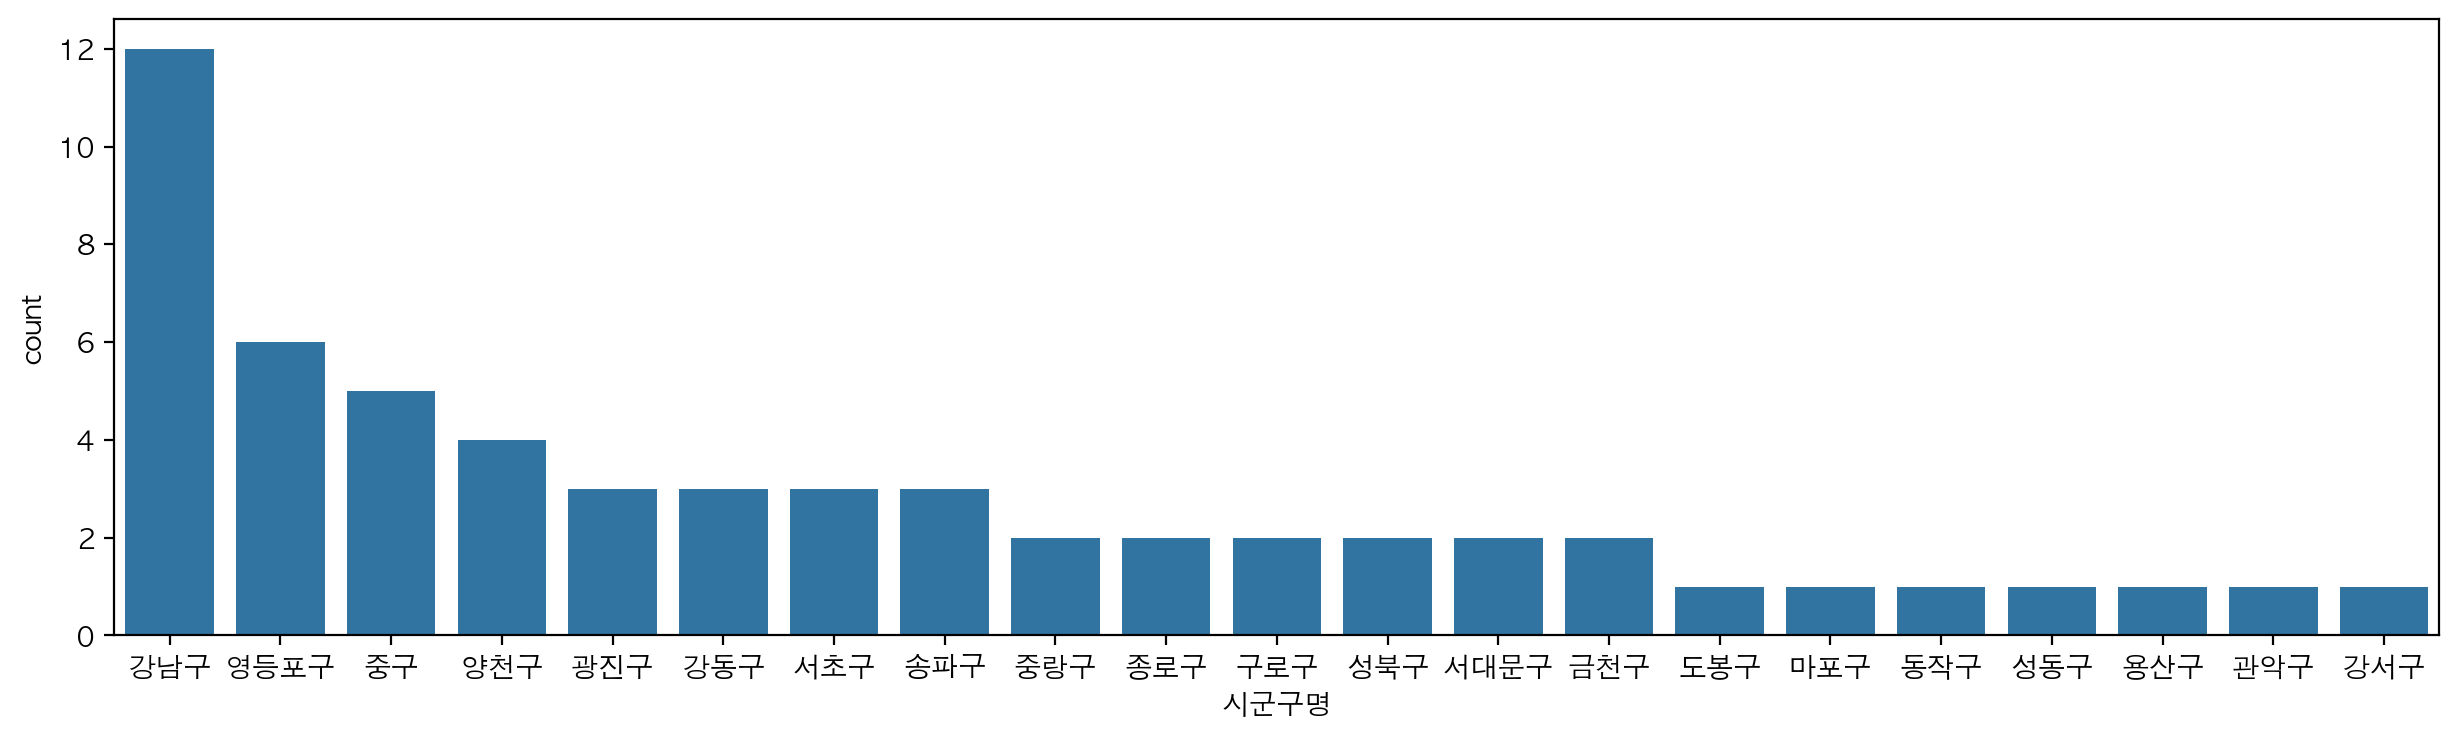

In [353]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x='시군구명', order=df_seoul_hospital['시군구명'].value_counts().index)

In [355]:
df_seoul_hospital['상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [361]:
df_seoul = df[df['시도명'] == '서울특별시']

<Axes: xlabel='시군구명'>

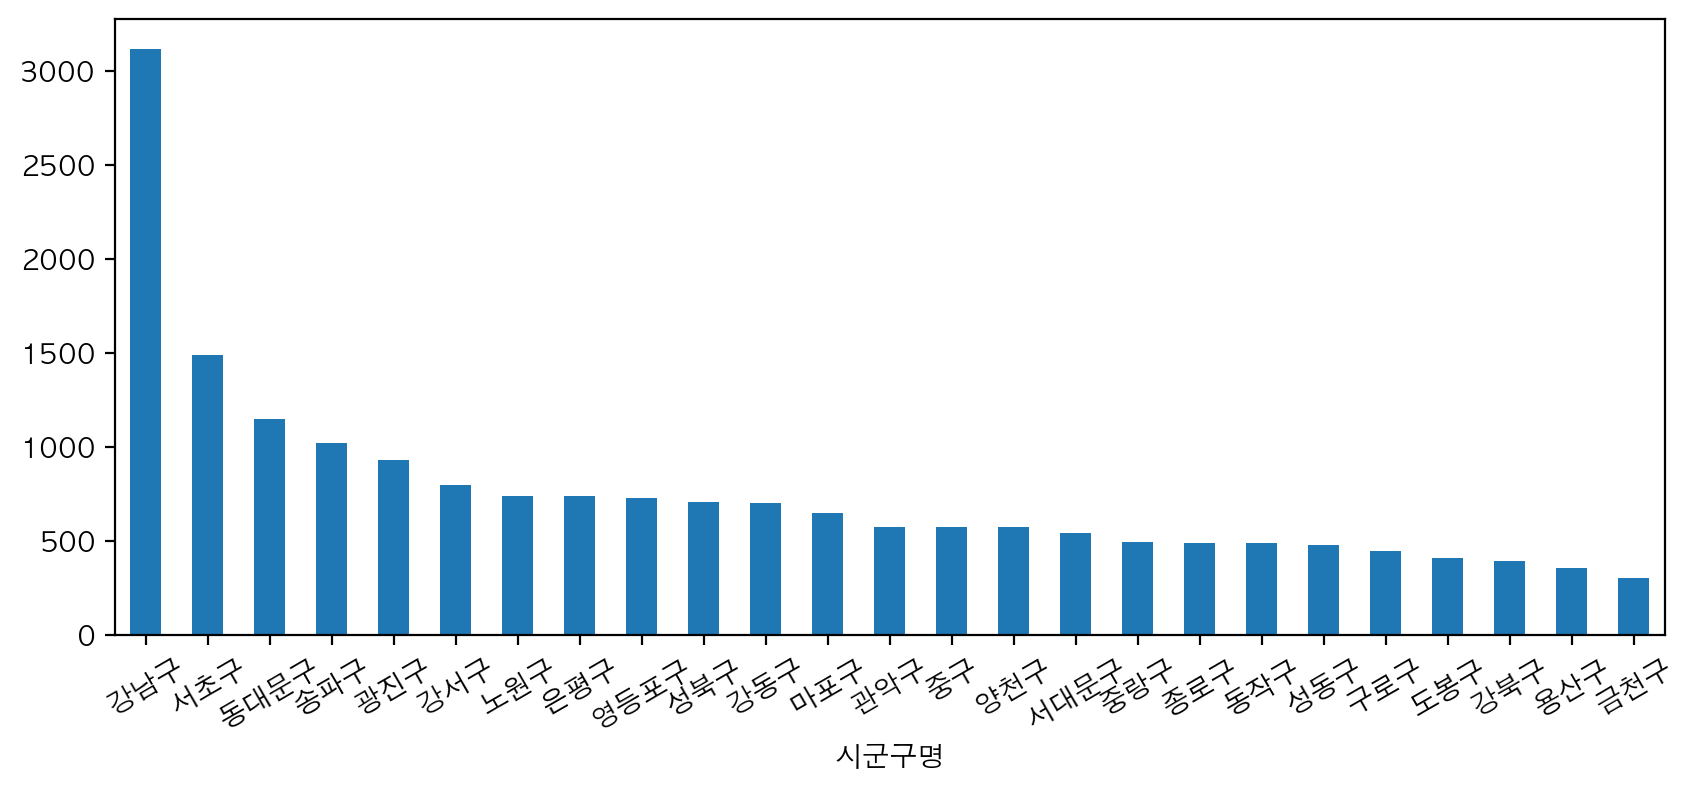

In [367]:
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10, 4), rot=30)

<Axes: xlabel='시군구명', ylabel='count'>

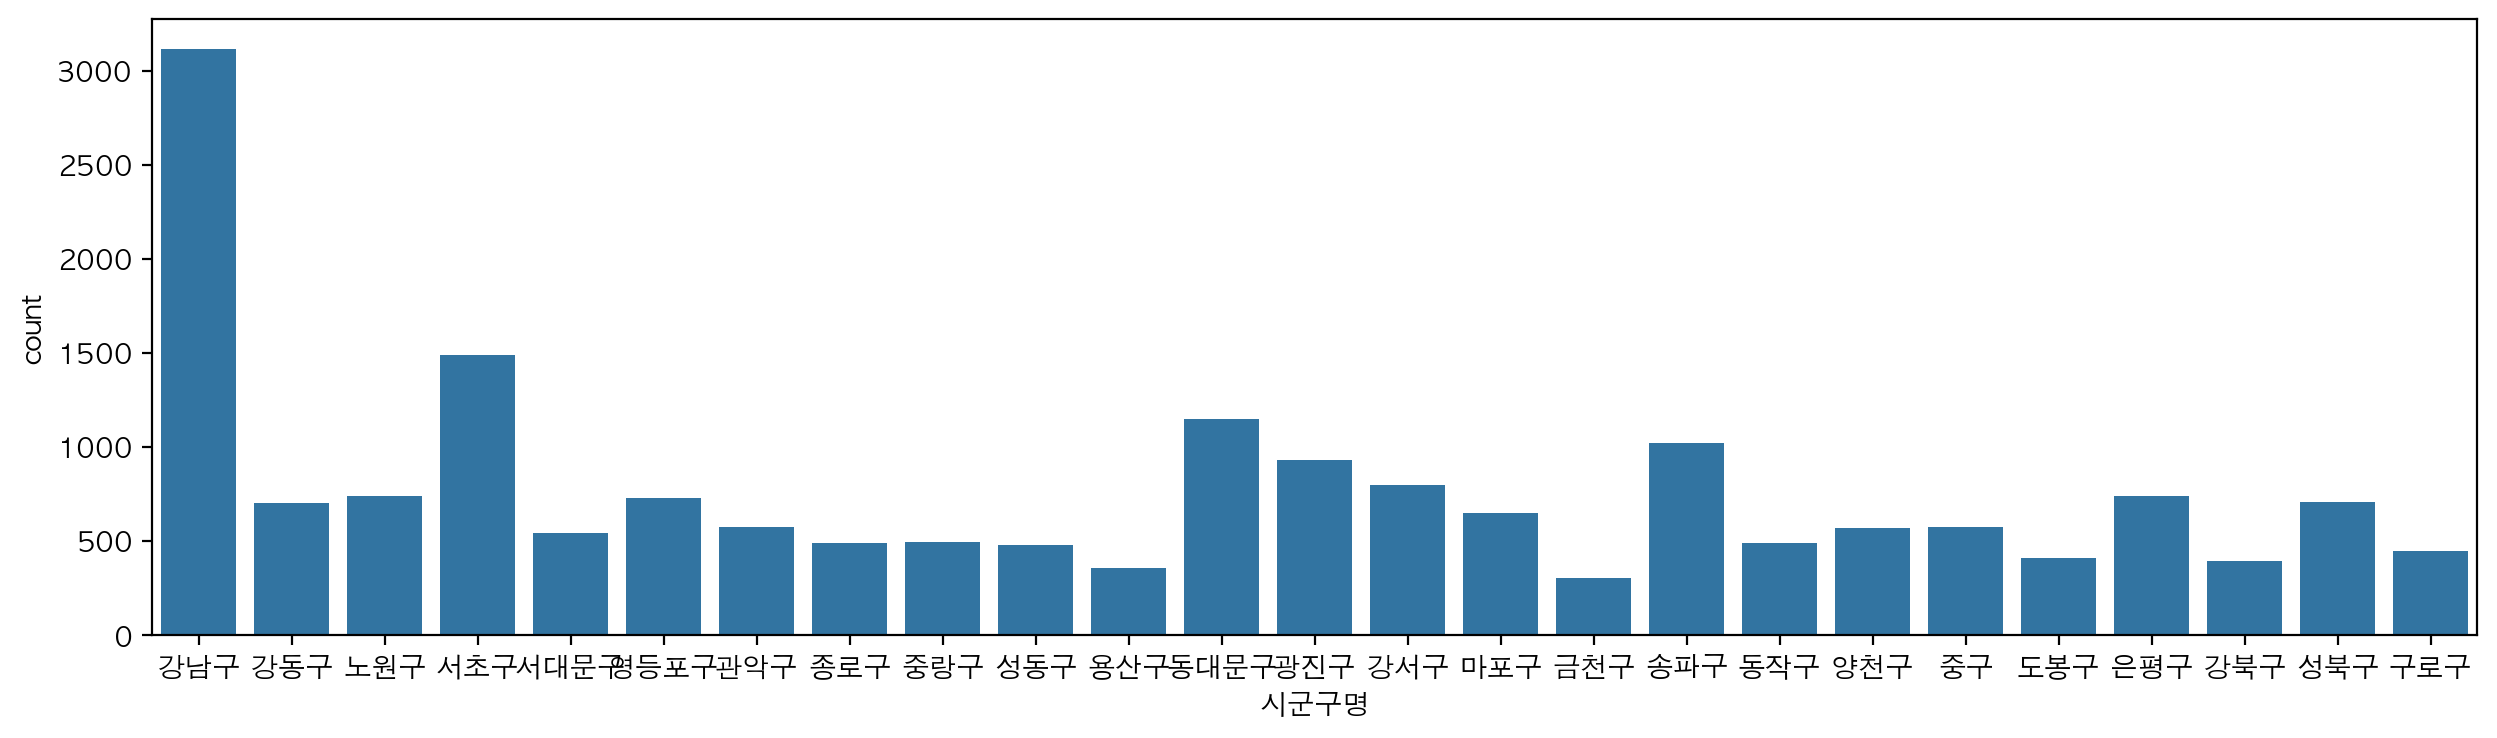

In [369]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x='시군구명')

<Axes: xlabel='경도', ylabel='위도'>

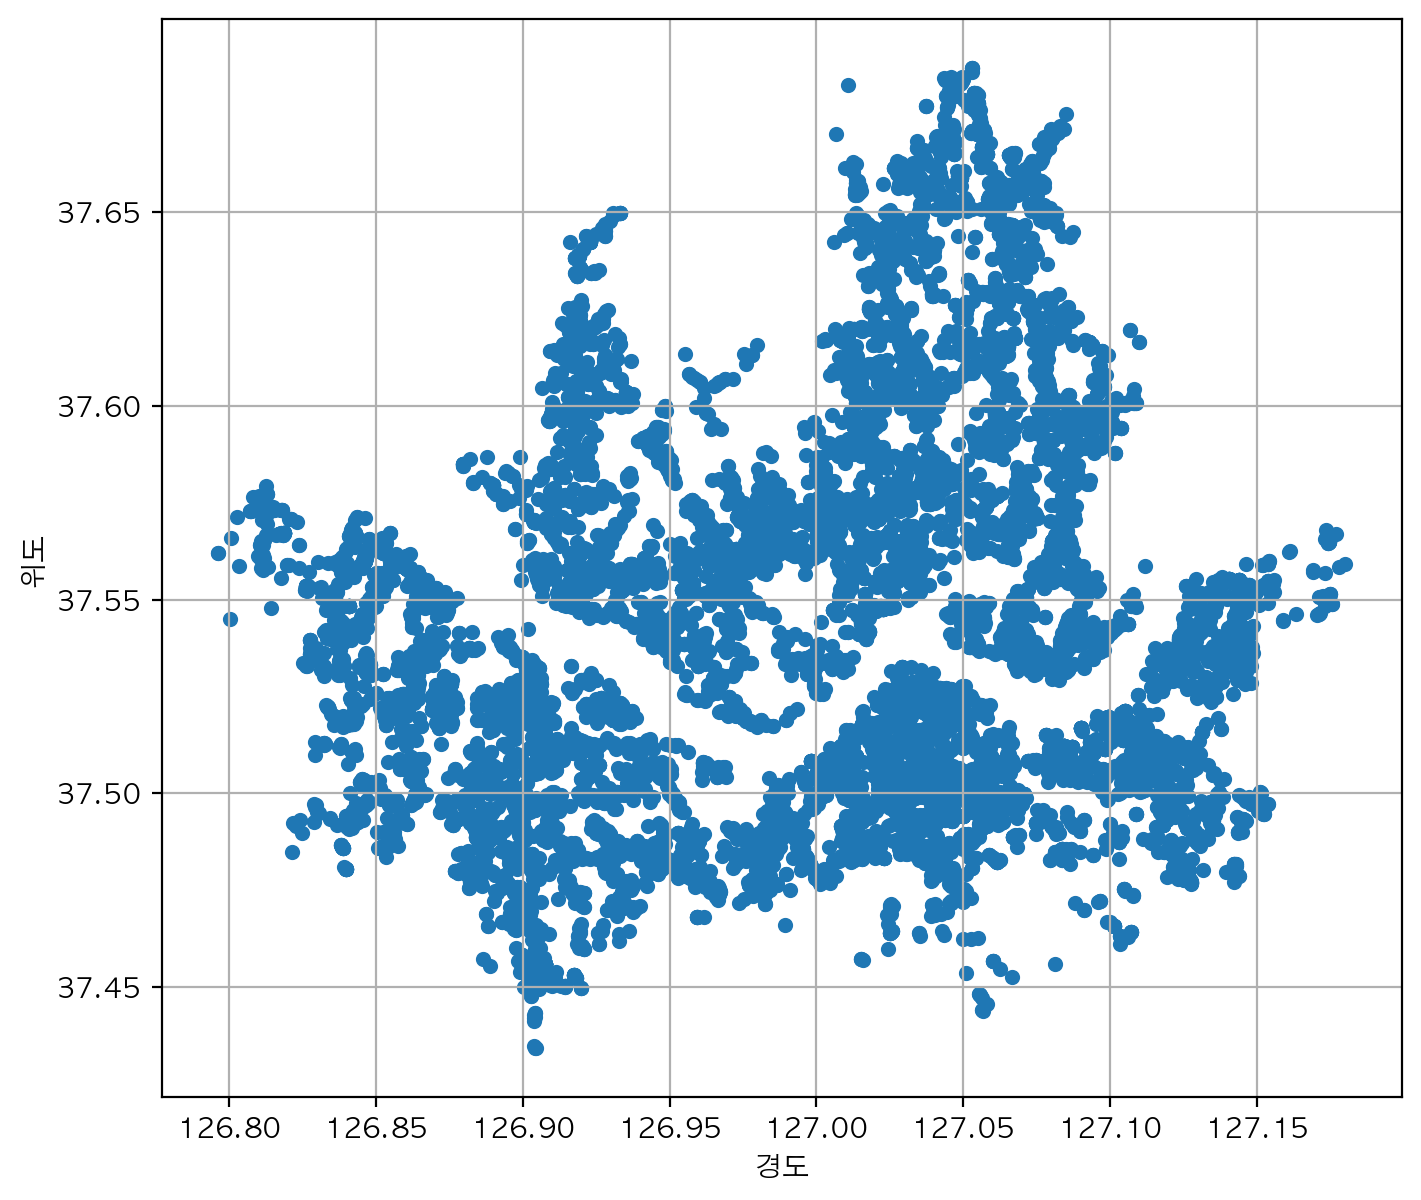

In [379]:
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x='경도', y='위도', figsize=(8, 7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

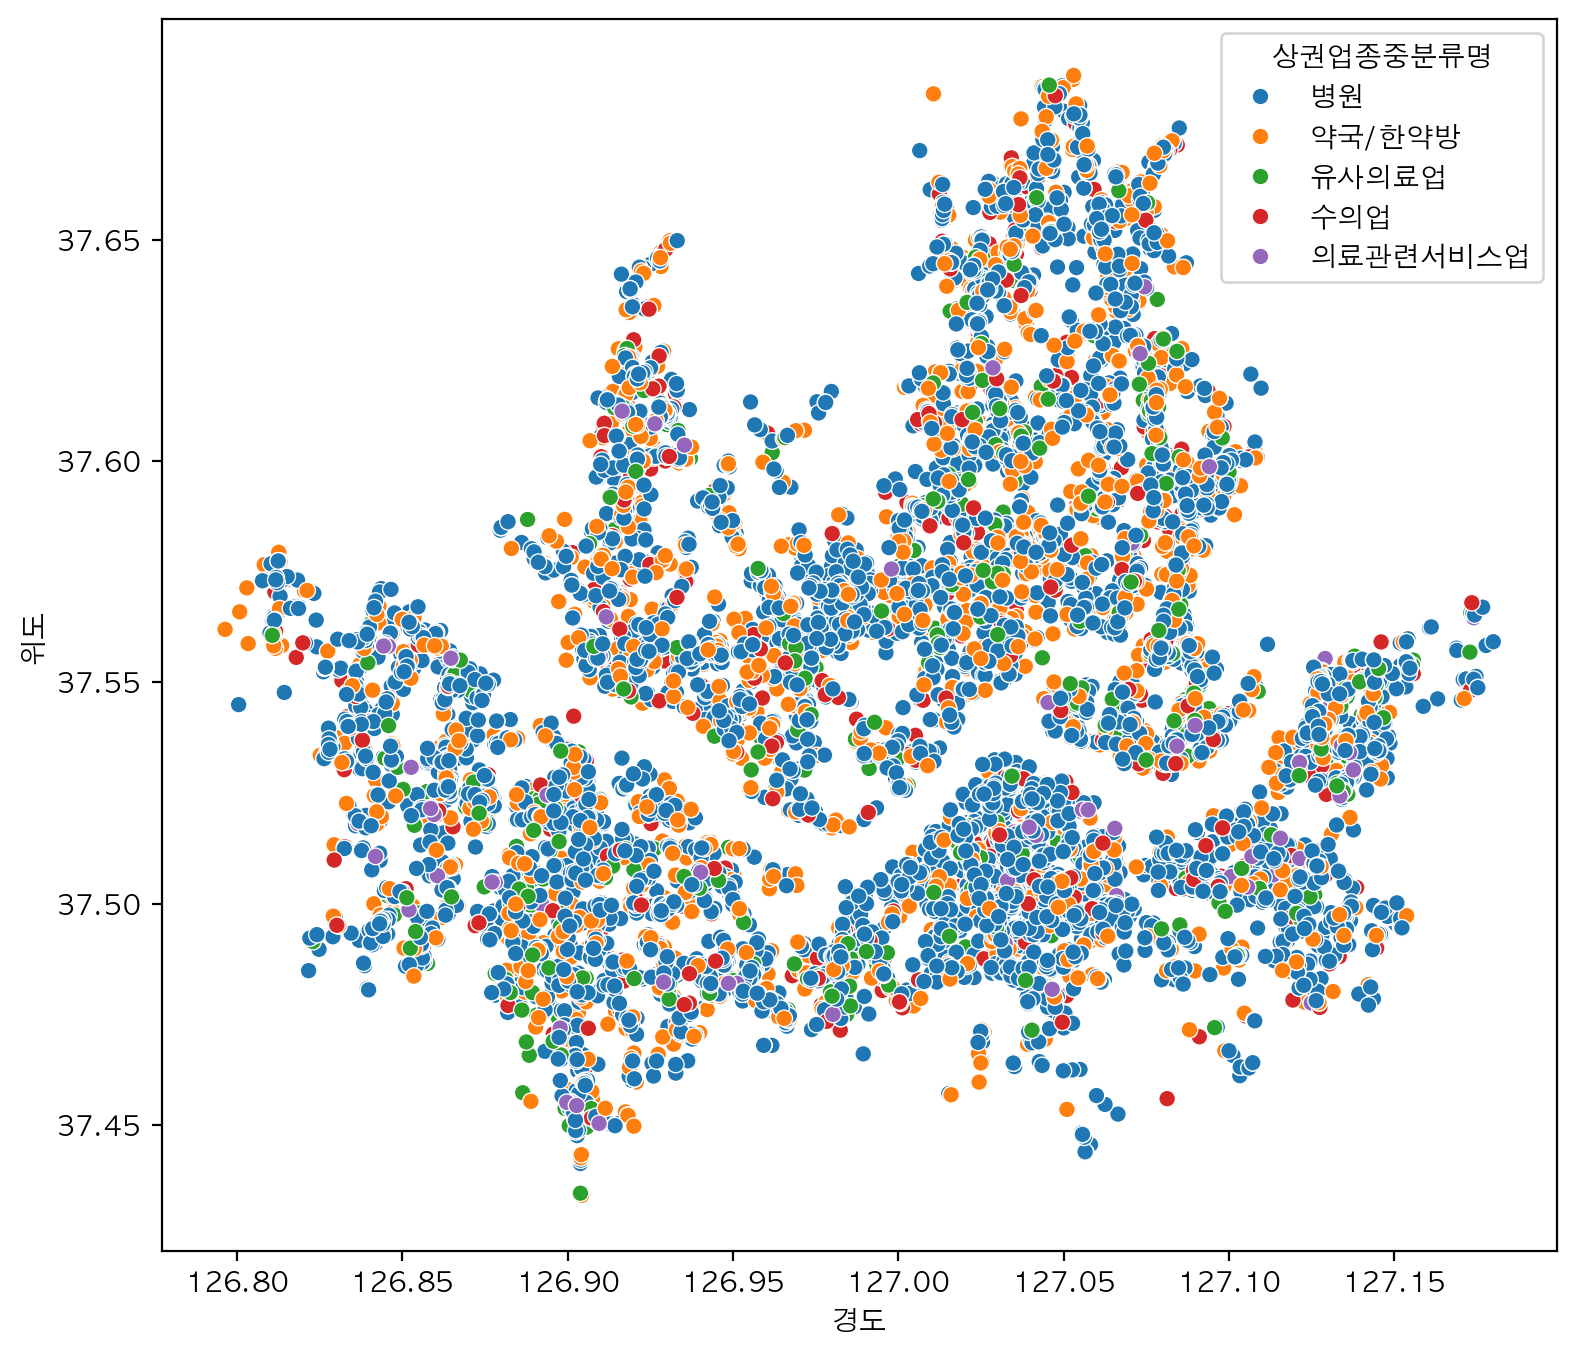

In [385]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x='경도', y='위도', hue='상권업종중분류명')

<Axes: xlabel='경도', ylabel='위도'>

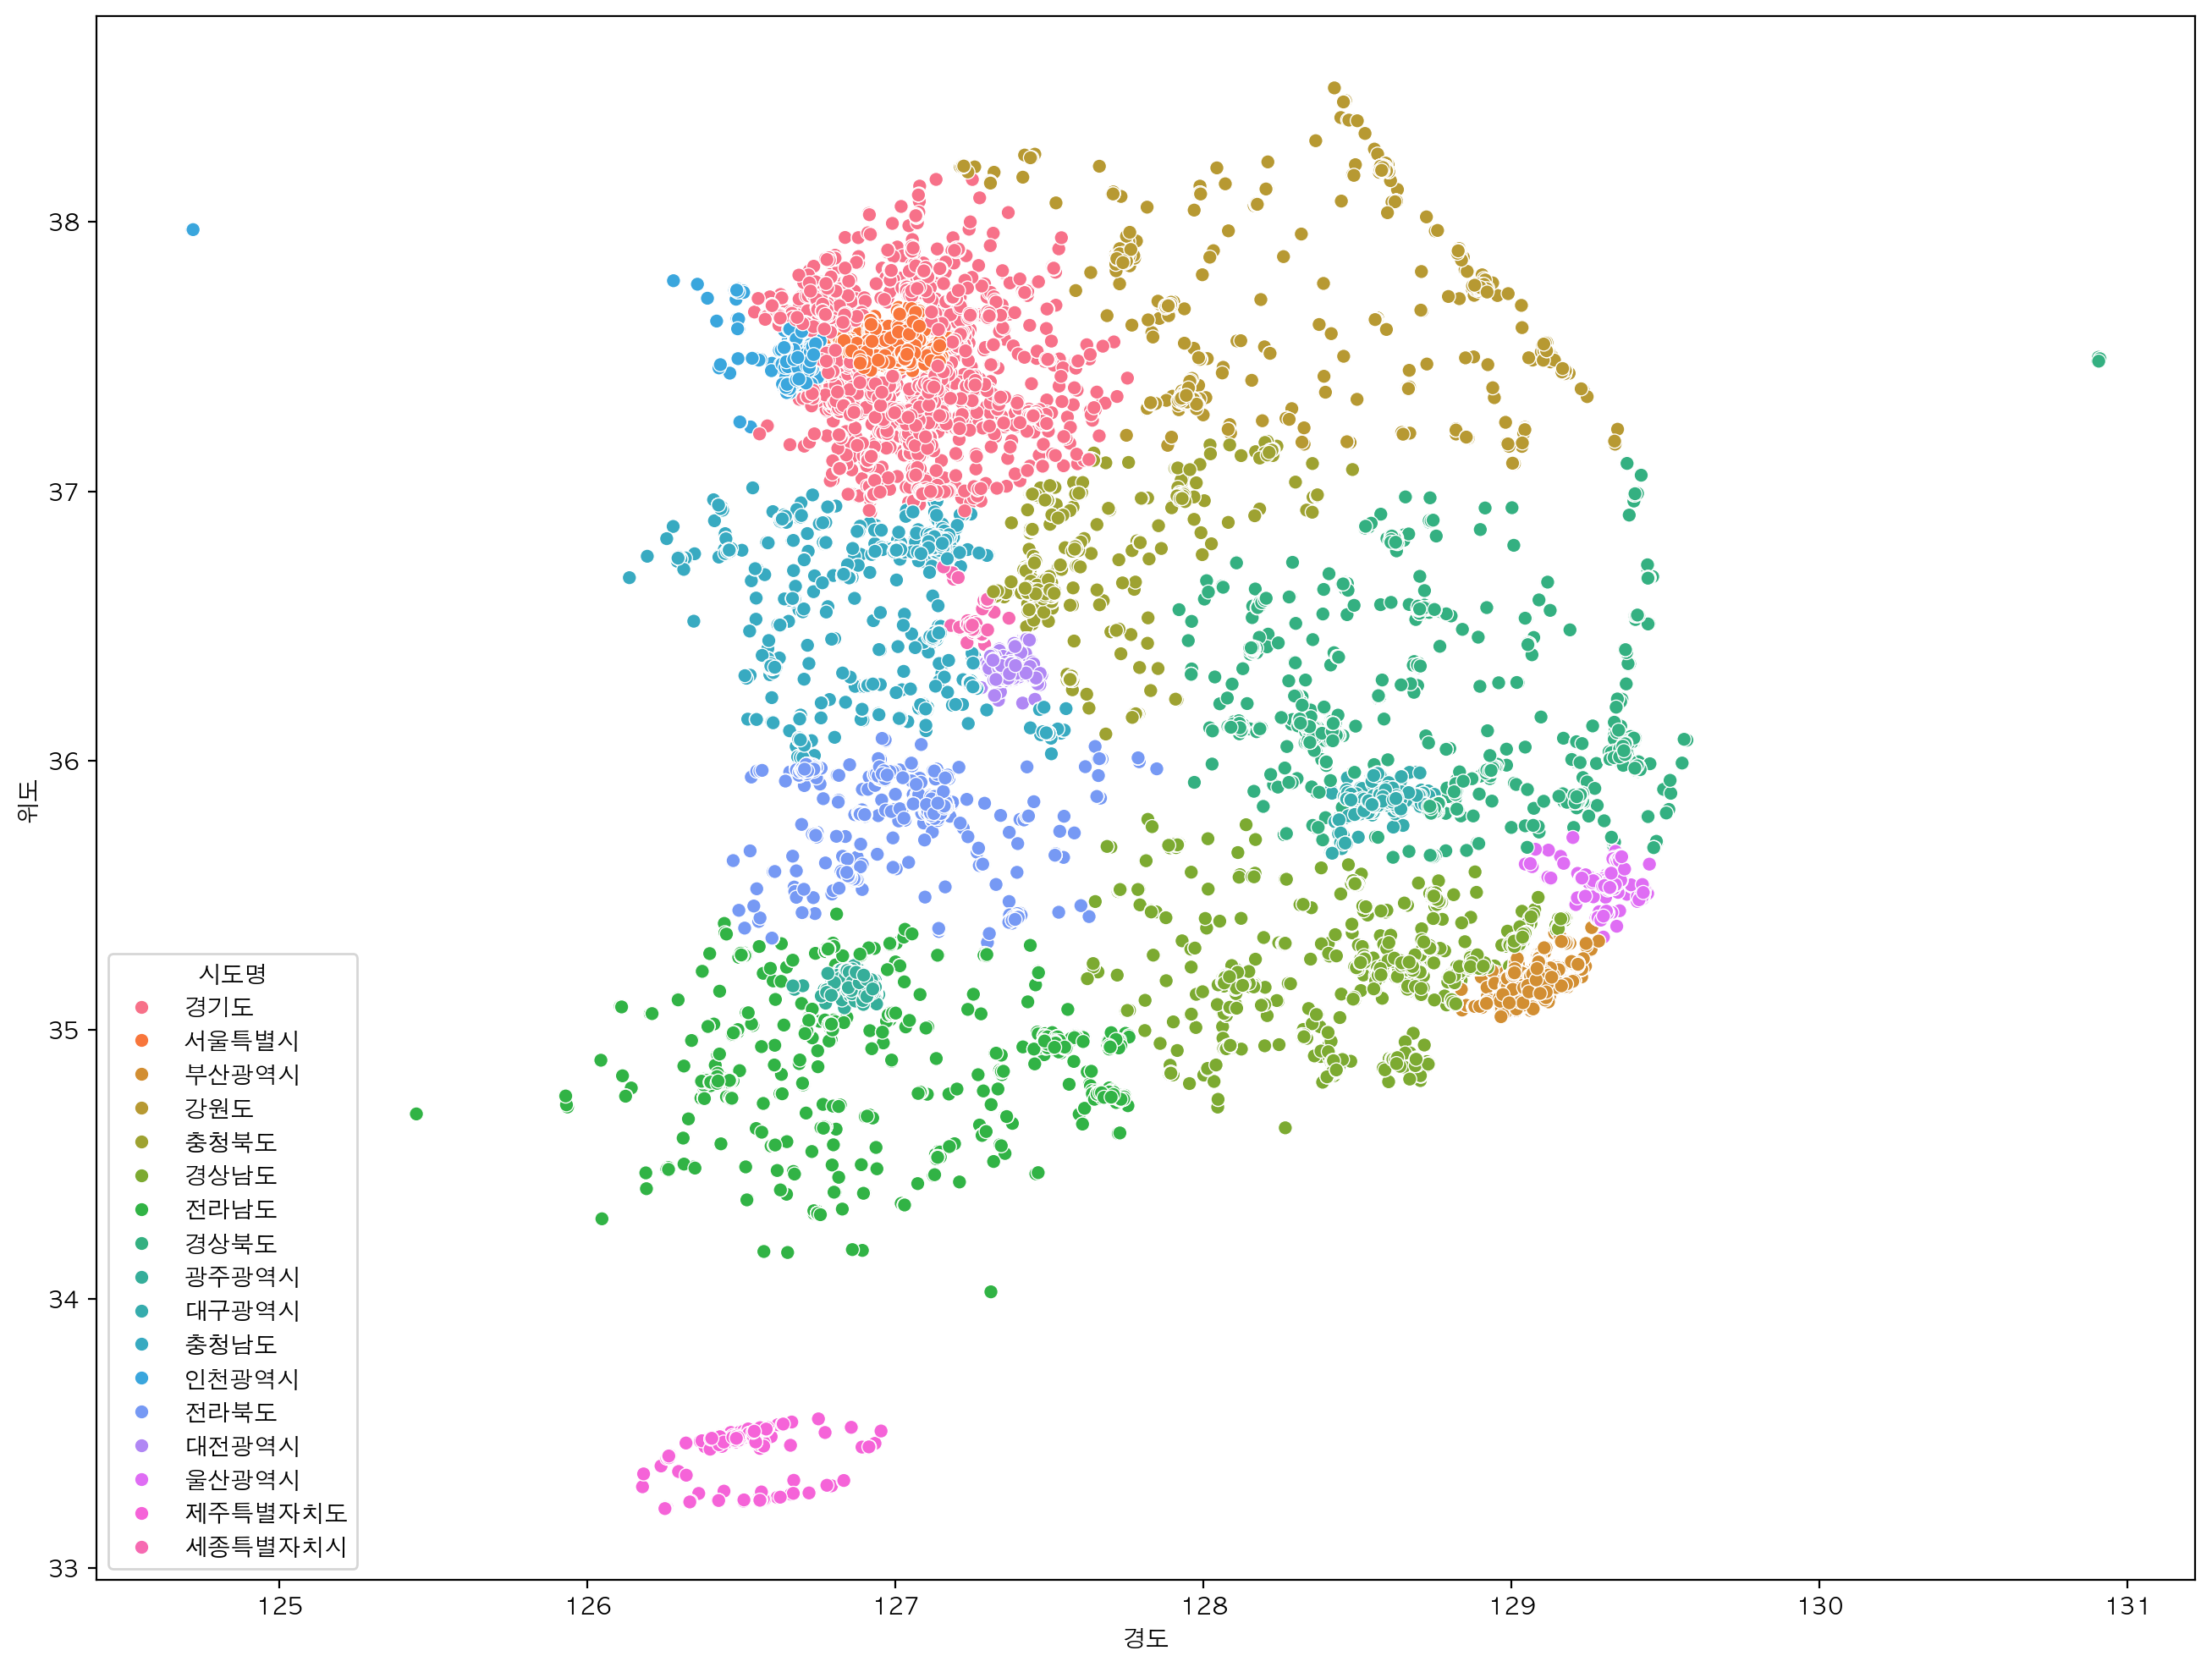

In [389]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x='경도', y='위도', hue='시도명')

In [405]:
import folium

lat = df_seoul_hospital['위도'].mean()
lon = df_seoul_hospital['경도'].mean()
map = folium.Map(location=[lat, lon], zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, '상호명']
    address = df_seoul_hospital.loc[n, '도로명주소']
    popup = f'{name}-{address}'
    location = [df_seoul_hospital.loc[n, '위도'], df_seoul_hospital.loc[n, '경도']]
    folium.Marker(
        location = location,
        popup = popup
    ).add_to(map)

map